<a href="https://colab.research.google.com/github/ParthBansal23/Customer_Churn_Prediction_Model/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


## Data Preprocessing


### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
def max_min_normalization(X):
    X_min = np.min(X, axis=0)  # Find the minimum value for each feature
    X_max = np.max(X, axis=0)  # Find the maximum value for each feature
    X_norm = (X - X_min) / (X_max - X_min)  # Apply the normalization formula
    return X_norm

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# First three columns are of no use for predicting the dependent variable, so we will not include them in the X variable
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset['Age_normal'] = max_min_normalization(dataset['Age'])

In [ ]:
dataset['EstimatedSalary_normal'] = max_min_normalization(dataset['EstimatedSalary'])
dataset['Balance_normal'] = max_min_normalization(dataset['Balance'])

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

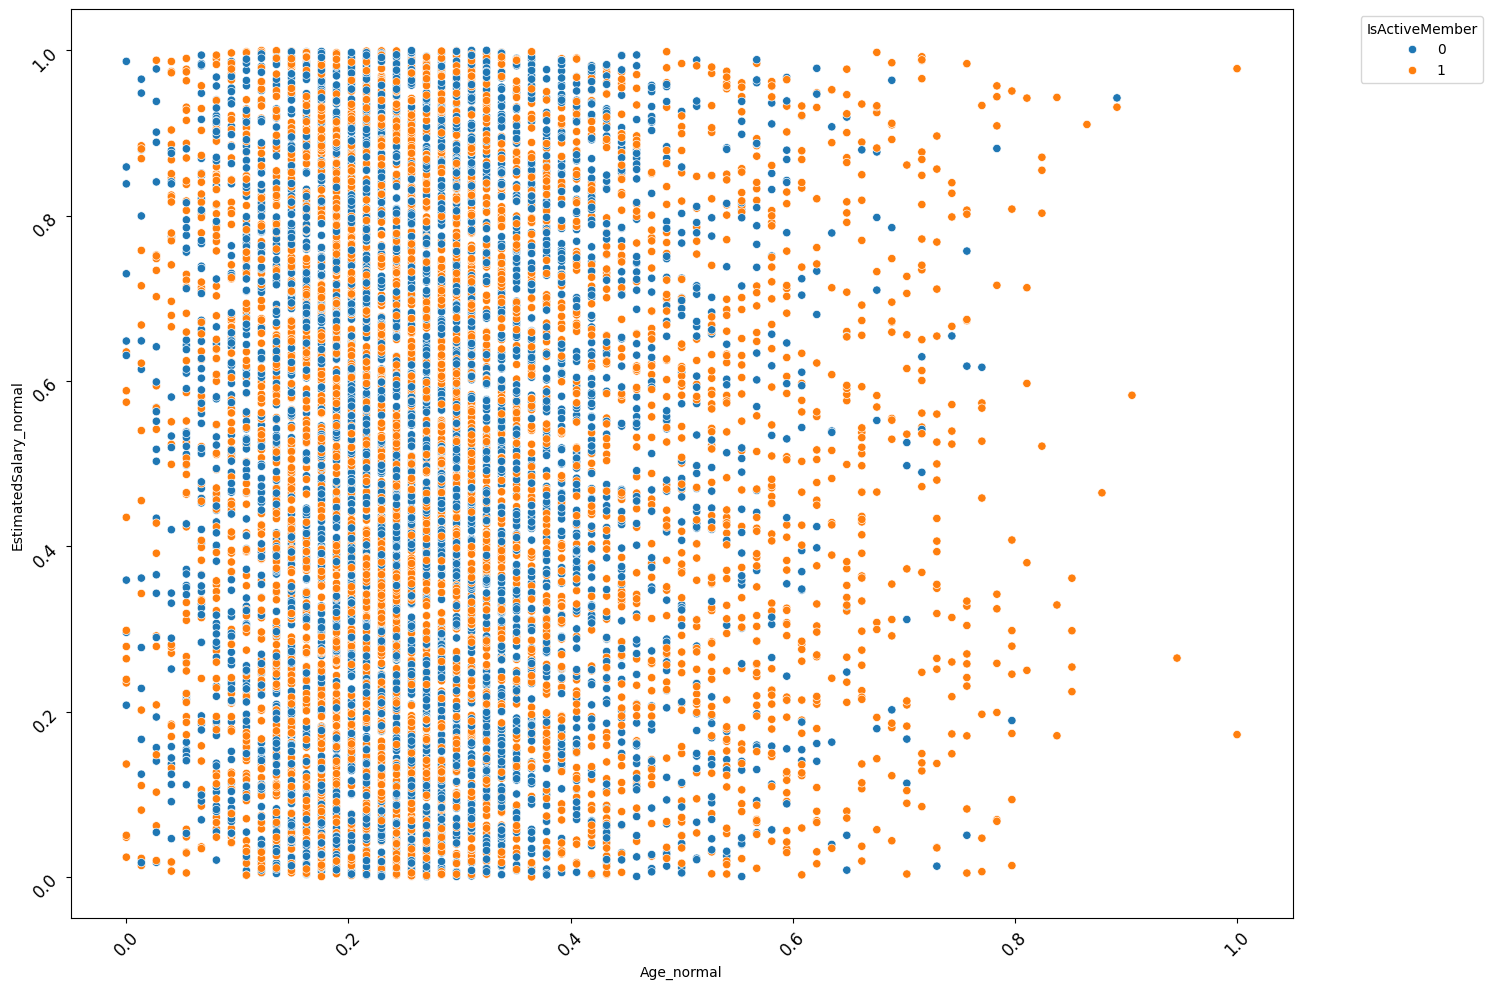

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=dataset['Age_normal'], y=dataset['EstimatedSalary_normal'], hue=dataset['IsActiveMember'])
plt.xticks(rotation=45, fontsize=12)  # Adjusting font size for x-axis
plt.yticks(rotation=45, fontsize=12)  # Adjusting font size for y-axis
plt.legend(title='IsActiveMember', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# We can see that age and estimated salary have no correlation

In [ ]:
def relu_activation(Z):
    return np.maximum(0, Z)

def relu_activation_derivative(Z):
    return Z>0

def sigmoid_activation(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_activation_derivative(Z):
    return sigmoid_activation(Z) * (1 - sigmoid_activation(Z))

In [ ]:
class layer:
  def __init__(self, input_size, output_size):
    self.output = None
    self.output_size = output_size
    self.weights = np.random.randn(output_size, input_size)* np.sqrt(2 / input_size)
    self.bias = np.random.randn(output_size, 1)

In [ ]:
from math import e
from tqdm import tqdm
import time
class ANN:
  def __init__(self,x):
    self.inputs = x
    self.y= None
    self.layers = []
    self.cost = []
    self.epoch = []
  def cost_function(self, Y,m):
    if len(self.layers) == 0:
      return 0
    return -(1/m) * np.sum(Y * np.log(self.layers[-1].output) + (1 - Y)*np.log(1 - self.layers[-1].output))

  def add(self, op_size):
    if len(self.layers) == 0:
      self.layers.append(layer(self.inputs, op_size))
    else:
      self.layers.append(layer(self.layers[-1].output_size, op_size))
  def forward_propagation(self,x):
     n = len(self.layers)
     for i in range(n):
       if i == 0:
         z = np.dot(self.layers[i].weights, x.T) + self.layers[i].bias
         self.layers[i].output = relu_activation(z)
       elif i == n-1:
         z = np.dot(self.layers[i].weights, self.layers[i-1].output) + self.layers[i].bias
         self.layers[i].output = sigmoid_activation(z)
       else:
         z = np.dot(self.layers[i].weights, self.layers[i-1].output) + self.layers[i].bias
         self.layers[i].output = relu_activation(z)
  def backward_propagation(self,X, Y, learning_rate):
     n = len(self.layers)
     m = X.shape[0]
     for i in range(n-1,-1,-1):
        if i == n-1:
          dZ = self.layers[i].output-Y.T
          dW = (1/m) * np.dot(dZ, self.layers[i-1].output.T)
          db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
          self.layers[i].weights -= learning_rate* dW
          self.layers[i].bias -= learning_rate * db
        elif i == 0:
          dA = np.dot(self.layers[i+1].weights.T, dZ)
          dZ = dA * relu_activation_derivative(self.layers[i].output)
          dW = (1/m) * np.dot(dZ, X)
          db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
          self.layers[i].weights -= learning_rate * dW
          self.layers[i].bias -= learning_rate * db
        else:
          dA = np.dot(self.layers[i+1].weights.T, dZ)
          dZ = dA * relu_activation_derivative(self.layers[i].output)
          dW = (1/m) * np.dot(dZ, self.layers[i-1].output.T)
          db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
          self.layers[i].weights -= learning_rate * dW
          self.layers[i].bias -= learning_rate * db

  def fit(self,X, y, epochs, learning_rate,batch_size=10):
     self.inputs = X
     self.cost = []
     self.epoch = []
     m = X.shape[0]
     num = int(m/batch_size)
     for i in range(epochs):
      costs = 0
      for j in tqdm(range(0, m, batch_size), total=num):
        time.sleep(0.001)
        X_batch = X[j:j+batch_size]
        y_batch = y[j:j+batch_size]
        self.forward_propagation(X_batch)
        self.backward_propagation(X_batch, y_batch, learning_rate)
        costs = costs + self.cost_function(y_batch, y_batch.shape[0])
      costs = costs/num
      self.cost.append(costs)
      self.epoch.append(i+1)
      print(f"Epoch {i+1}, Cost: {costs}")
  def predict(self, X):
     self.inputs = X
     self.forward_propagation(X)
     self.y = self.layers[-1].output.T
     return self.y
  def show_weights(self):
    n = len(self.layers)
    for i in range(n-1,-1,-1):
      print(f"Layer{i+1}")
      print(f"Bias:")
      print(f"Shape{self.layers[i].bias.shape}")
      print(self.layers[i].bias.T)
      print(f"Weights:")
      print(f"Shape{self.layers[i].weights.shape}")
      print(self.layers[i].weights.T)




## Building the ANN

### Initializing the ANN

In [ ]:
model = ANN(X_train.shape[1])

### Adding the first and second hidden layer and the output layer

In [ ]:
model.add(6)
model.add(6)
model.add(1)

In [ ]:
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

100%|██████████| 250/250 [00:00<00:00, 763.29it/s]


Epoch 1, Cost: 0.8244474569573408


100%|██████████| 250/250 [00:00<00:00, 746.16it/s]


Epoch 2, Cost: 0.5396326332064474


100%|██████████| 250/250 [00:00<00:00, 751.60it/s]


Epoch 3, Cost: 0.4817177988875417


100%|██████████| 250/250 [00:00<00:00, 759.86it/s]


Epoch 4, Cost: 0.45543346368089294


100%|██████████| 250/250 [00:00<00:00, 738.78it/s]


Epoch 5, Cost: 0.44128868124277665


100%|██████████| 250/250 [00:00<00:00, 759.25it/s]


Epoch 6, Cost: 0.43267008391766176


100%|██████████| 250/250 [00:00<00:00, 816.24it/s]


Epoch 7, Cost: 0.4270652047085783


100%|██████████| 250/250 [00:00<00:00, 794.03it/s]


Epoch 8, Cost: 0.42301545731449686


100%|██████████| 250/250 [00:00<00:00, 804.59it/s]


Epoch 9, Cost: 0.419867949972346


100%|██████████| 250/250 [00:00<00:00, 820.96it/s]


Epoch 10, Cost: 0.4170374064814928


100%|██████████| 250/250 [00:00<00:00, 812.47it/s]


Epoch 11, Cost: 0.41455643483901333


100%|██████████| 250/250 [00:00<00:00, 798.41it/s]


Epoch 12, Cost: 0.4123744275041952


100%|██████████| 250/250 [00:00<00:00, 806.09it/s]


Epoch 13, Cost: 0.41022033845846556


100%|██████████| 250/250 [00:00<00:00, 807.24it/s]


Epoch 14, Cost: 0.40805337281981635


100%|██████████| 250/250 [00:00<00:00, 805.23it/s]


Epoch 15, Cost: 0.405950532837754


100%|██████████| 250/250 [00:00<00:00, 803.08it/s]


Epoch 16, Cost: 0.40382348199750323


100%|██████████| 250/250 [00:00<00:00, 817.42it/s]


Epoch 17, Cost: 0.40170844950283674


100%|██████████| 250/250 [00:00<00:00, 805.58it/s]


Epoch 18, Cost: 0.3994871369366632


100%|██████████| 250/250 [00:00<00:00, 805.61it/s]


Epoch 19, Cost: 0.39713335001096545


100%|██████████| 250/250 [00:00<00:00, 797.07it/s]


Epoch 20, Cost: 0.3946790295293006


100%|██████████| 250/250 [00:00<00:00, 813.08it/s]


Epoch 21, Cost: 0.3921332937661513


100%|██████████| 250/250 [00:00<00:00, 818.19it/s]


Epoch 22, Cost: 0.38948573884495824


100%|██████████| 250/250 [00:00<00:00, 821.87it/s]


Epoch 23, Cost: 0.3870602893784795


100%|██████████| 250/250 [00:00<00:00, 821.33it/s]


Epoch 24, Cost: 0.38487999043917687


100%|██████████| 250/250 [00:00<00:00, 799.01it/s]


Epoch 25, Cost: 0.3827852252813798


100%|██████████| 250/250 [00:00<00:00, 819.17it/s]


Epoch 26, Cost: 0.38074003114541655


100%|██████████| 250/250 [00:00<00:00, 819.05it/s]


Epoch 27, Cost: 0.37881084452754465


100%|██████████| 250/250 [00:00<00:00, 804.03it/s]


Epoch 28, Cost: 0.3770134350576251


100%|██████████| 250/250 [00:00<00:00, 814.47it/s]


Epoch 29, Cost: 0.37525057245429877


100%|██████████| 250/250 [00:00<00:00, 820.27it/s]


Epoch 30, Cost: 0.3735101189075897


100%|██████████| 250/250 [00:00<00:00, 811.38it/s]


Epoch 31, Cost: 0.37184125128593803


100%|██████████| 250/250 [00:00<00:00, 813.06it/s]


Epoch 32, Cost: 0.3702248064769181


100%|██████████| 250/250 [00:00<00:00, 825.16it/s]


Epoch 33, Cost: 0.3686403835315243


100%|██████████| 250/250 [00:00<00:00, 821.55it/s]


Epoch 34, Cost: 0.3671138681511428


100%|██████████| 250/250 [00:00<00:00, 804.71it/s]


Epoch 35, Cost: 0.36568303910989536


100%|██████████| 250/250 [00:00<00:00, 824.68it/s]


Epoch 36, Cost: 0.3642172194386487


100%|██████████| 250/250 [00:00<00:00, 823.63it/s]


Epoch 37, Cost: 0.3628145046345661


100%|██████████| 250/250 [00:00<00:00, 776.48it/s]


Epoch 38, Cost: 0.36149410910366897


100%|██████████| 250/250 [00:00<00:00, 752.96it/s]


Epoch 39, Cost: 0.3602250385159252


100%|██████████| 250/250 [00:00<00:00, 754.70it/s]


Epoch 40, Cost: 0.3590056454599078


100%|██████████| 250/250 [00:00<00:00, 752.95it/s]


Epoch 41, Cost: 0.357844119206307


100%|██████████| 250/250 [00:00<00:00, 739.11it/s]


Epoch 42, Cost: 0.3567431945364465


100%|██████████| 250/250 [00:00<00:00, 749.51it/s]


Epoch 43, Cost: 0.3556656660054632


100%|██████████| 250/250 [00:00<00:00, 789.75it/s]


Epoch 44, Cost: 0.35464289535136845


100%|██████████| 250/250 [00:00<00:00, 811.91it/s]


Epoch 45, Cost: 0.3536510717009891


100%|██████████| 250/250 [00:00<00:00, 822.84it/s]


Epoch 46, Cost: 0.3527030707527635


100%|██████████| 250/250 [00:00<00:00, 796.84it/s]


Epoch 47, Cost: 0.35176481632092044


100%|██████████| 250/250 [00:00<00:00, 751.48it/s]


Epoch 48, Cost: 0.35087374528607285


100%|██████████| 250/250 [00:00<00:00, 749.70it/s]


Epoch 49, Cost: 0.3500248545496178


100%|██████████| 250/250 [00:00<00:00, 806.45it/s]


Epoch 50, Cost: 0.34923134935110195


100%|██████████| 250/250 [00:00<00:00, 702.58it/s]


Epoch 51, Cost: 0.34844036532299044


100%|██████████| 250/250 [00:00<00:00, 762.59it/s]


Epoch 52, Cost: 0.34769539340615807


100%|██████████| 250/250 [00:00<00:00, 793.90it/s]


Epoch 53, Cost: 0.3470370668797737


100%|██████████| 250/250 [00:00<00:00, 816.89it/s]


Epoch 54, Cost: 0.34645558112801894


100%|██████████| 250/250 [00:00<00:00, 820.36it/s]


Epoch 55, Cost: 0.34588715426362654


100%|██████████| 250/250 [00:00<00:00, 812.14it/s]


Epoch 56, Cost: 0.3453360714789233


100%|██████████| 250/250 [00:00<00:00, 797.69it/s]


Epoch 57, Cost: 0.34483276984541217


100%|██████████| 250/250 [00:00<00:00, 816.80it/s]


Epoch 58, Cost: 0.344392527412445


100%|██████████| 250/250 [00:00<00:00, 817.15it/s]


Epoch 59, Cost: 0.34399800536634234


100%|██████████| 250/250 [00:00<00:00, 797.76it/s]


Epoch 60, Cost: 0.34364583703093293


100%|██████████| 250/250 [00:00<00:00, 812.52it/s]


Epoch 61, Cost: 0.34328556340462546


100%|██████████| 250/250 [00:00<00:00, 817.24it/s]


Epoch 62, Cost: 0.3429848442476521


100%|██████████| 250/250 [00:00<00:00, 798.14it/s]


Epoch 63, Cost: 0.3427353628466161


100%|██████████| 250/250 [00:00<00:00, 813.20it/s]


Epoch 64, Cost: 0.3425011410993279


100%|██████████| 250/250 [00:00<00:00, 812.26it/s]


Epoch 65, Cost: 0.34227181253297145


100%|██████████| 250/250 [00:00<00:00, 798.98it/s]


Epoch 66, Cost: 0.34205582165787507


100%|██████████| 250/250 [00:00<00:00, 815.61it/s]


Epoch 67, Cost: 0.3418523096376213


100%|██████████| 250/250 [00:00<00:00, 813.07it/s]


Epoch 68, Cost: 0.34165693797248936


100%|██████████| 250/250 [00:00<00:00, 805.76it/s]


Epoch 69, Cost: 0.34145897372153877


100%|██████████| 250/250 [00:00<00:00, 809.52it/s]


Epoch 70, Cost: 0.34131674967987335


100%|██████████| 250/250 [00:00<00:00, 811.79it/s]


Epoch 71, Cost: 0.3411610792542537


100%|██████████| 250/250 [00:00<00:00, 813.82it/s]


Epoch 72, Cost: 0.3410072821130666


100%|██████████| 250/250 [00:00<00:00, 790.43it/s]


Epoch 73, Cost: 0.3408838539915235


100%|██████████| 250/250 [00:00<00:00, 818.76it/s]


Epoch 74, Cost: 0.3407455476994555


100%|██████████| 250/250 [00:00<00:00, 757.12it/s]


Epoch 75, Cost: 0.34061824183788686


100%|██████████| 250/250 [00:00<00:00, 753.87it/s]


Epoch 76, Cost: 0.34048813799599587


100%|██████████| 250/250 [00:00<00:00, 748.00it/s]


Epoch 77, Cost: 0.34039930089119497


100%|██████████| 250/250 [00:00<00:00, 722.95it/s]


Epoch 78, Cost: 0.34028203398344914


100%|██████████| 250/250 [00:00<00:00, 737.29it/s]


Epoch 79, Cost: 0.34017201643145356


100%|██████████| 250/250 [00:00<00:00, 774.00it/s]


Epoch 80, Cost: 0.3400024565917418


100%|██████████| 250/250 [00:00<00:00, 816.88it/s]


Epoch 81, Cost: 0.3399115737347065


100%|██████████| 250/250 [00:00<00:00, 797.45it/s]


Epoch 82, Cost: 0.33979556393555393


100%|██████████| 250/250 [00:00<00:00, 816.20it/s]


Epoch 83, Cost: 0.3396911153806551


100%|██████████| 250/250 [00:00<00:00, 815.75it/s]


Epoch 84, Cost: 0.3396363583401737


100%|██████████| 250/250 [00:00<00:00, 803.02it/s]


Epoch 85, Cost: 0.33950085872762825


100%|██████████| 250/250 [00:00<00:00, 808.91it/s]


Epoch 86, Cost: 0.3394111102724758


100%|██████████| 250/250 [00:00<00:00, 814.65it/s]


Epoch 87, Cost: 0.33931183387965674


100%|██████████| 250/250 [00:00<00:00, 804.15it/s]


Epoch 88, Cost: 0.33919416805761693


100%|██████████| 250/250 [00:00<00:00, 808.95it/s]


Epoch 89, Cost: 0.3390625701286829


100%|██████████| 250/250 [00:00<00:00, 813.82it/s]


Epoch 90, Cost: 0.3389237434644819


100%|██████████| 250/250 [00:00<00:00, 800.68it/s]


Epoch 91, Cost: 0.3388065749275369


100%|██████████| 250/250 [00:00<00:00, 805.56it/s]


Epoch 92, Cost: 0.3386774654590527


100%|██████████| 250/250 [00:00<00:00, 819.61it/s]


Epoch 93, Cost: 0.3385485161378264


100%|██████████| 250/250 [00:00<00:00, 806.69it/s]


Epoch 94, Cost: 0.33843519433700586


100%|██████████| 250/250 [00:00<00:00, 802.80it/s]


Epoch 95, Cost: 0.3383318921824961


100%|██████████| 250/250 [00:00<00:00, 817.41it/s]


Epoch 96, Cost: 0.3382240608264459


100%|██████████| 250/250 [00:00<00:00, 815.26it/s]


Epoch 97, Cost: 0.3381258324156845


100%|██████████| 250/250 [00:00<00:00, 802.16it/s]


Epoch 98, Cost: 0.33802082602453215


100%|██████████| 250/250 [00:00<00:00, 802.95it/s]


Epoch 99, Cost: 0.3379126710932323


100%|██████████| 250/250 [00:00<00:00, 815.68it/s]

Epoch 100, Cost: 0.3378110520027114


In [ ]:
model.show_weights()

Layer3
Bias:
Shape(1, 1)
[[1.34250958]]
Weights:
Shape(1, 6)
[[-1.91120818]
 [-0.58230509]
 [ 0.61616845]
 [ 0.63436895]
 [-0.90052138]
 [-0.61973747]]
Layer2
Bias:
Shape(6, 1)
[[ 1.02376688 -0.52180103 -0.62954852  0.09483851  0.26195074  0.57318812]]
Weights:
Shape(6, 6)
[[-0.13250571  0.15818856  1.28030415  0.52714858 -0.28353072 -0.79923504]
 [ 0.03777196 -0.46488068  0.67945322  0.27967575  1.00288426  0.08508745]
 [ 0.47699862  0.96056805  0.38505705  0.26761156 -0.17330042 -0.12576951]
 [-0.32026407 -0.69911812 -0.20035501 -0.45295289  0.51093336  0.18657958]
 [ 1.05595249 -0.50161623 -0.05303655  0.39028164  0.69553359 -0.00509393]
 [-0.58936422 -0.48669882  0.57537096  0.73956678 -0.61347588 -0.55779516]]
Layer1
Bias:
Shape(6, 1)
[[0.34745446 0.94188689 0.5157808  0.36246068 1.2499274  0.3029296 ]]
Weights:
Shape(6, 12)
[[-0.29703186 -0.14307809 -0.01794729  0.72724831  0.14340109 -0.49898547]
 [-0.24864259  0.48496784  0.77362264 -0.78777553 -0.02440306 -0.25527813]
 [-0.168

## Making the predictions and evaluating the model

### Predicting the result of a single observation

Using our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

Will this customer exit or not ?

In [ ]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank.

### Predicting the Test set results

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1538   69]
 [ 212  181]]


0.8595

In [ ]:
loss_normalized = max_min_normalization(model.cost)

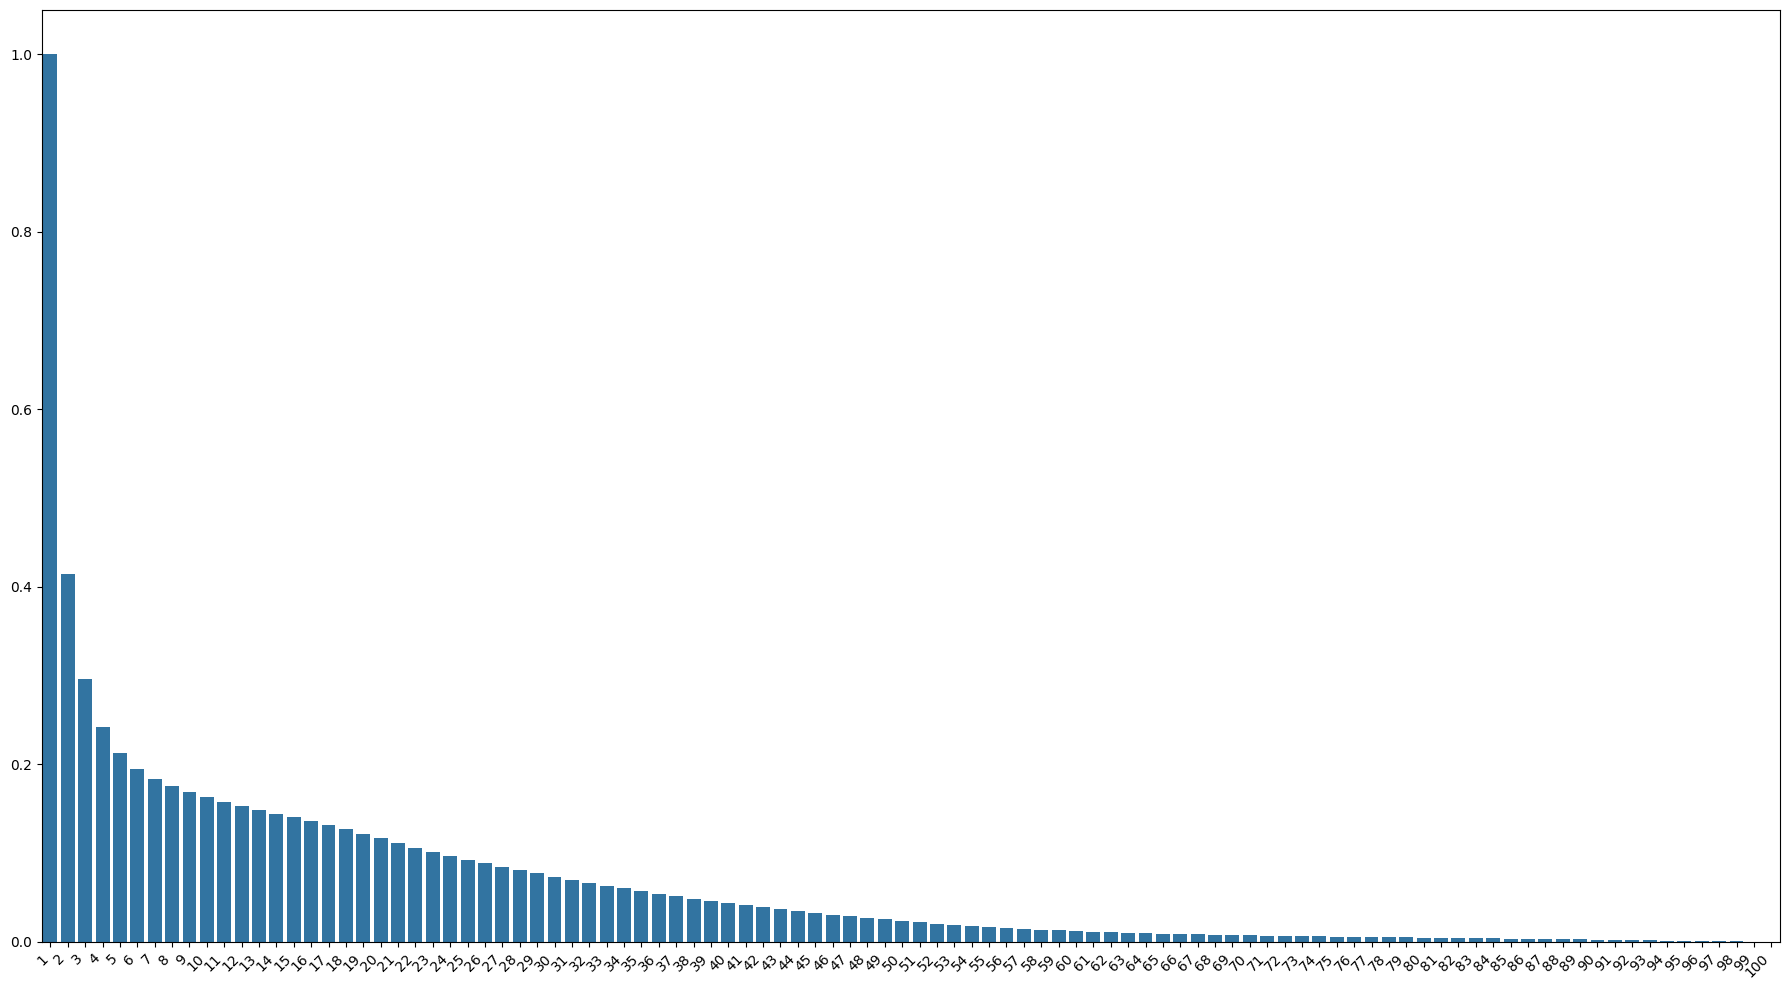

In [ ]:
plt.figure(figsize=(18, 10))
sns.barplot(x=model.epoch, y=loss_normalized)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()